In [ ]:
import sys
!{sys.executable} -m pip install pandas tqdm matplotlib numpy

# https://awstip.com/how-to-use-a-newer-python-version-in-aws-sagemaker-notebook-1682a89625ef
# https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

In [7]:
import pandas as pd
from tqdm import tqdm # handy for timing interations
from matplotlib import pyplot as plt
import numpy as np

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

#### Setup for the data

In [4]:
loc_df = pd.read_csv('~/Downloads/instagram_locations.zip', delimiter='\t')

In [5]:
profiles_df = pd.read_csv('~/Downloads/instagram_profiles.zip', delimiter='\t')

### Research Question 2


#### Plot the number of posts for each profile in descending order.

Text(0, 0.5, 'log(# Profiles)')

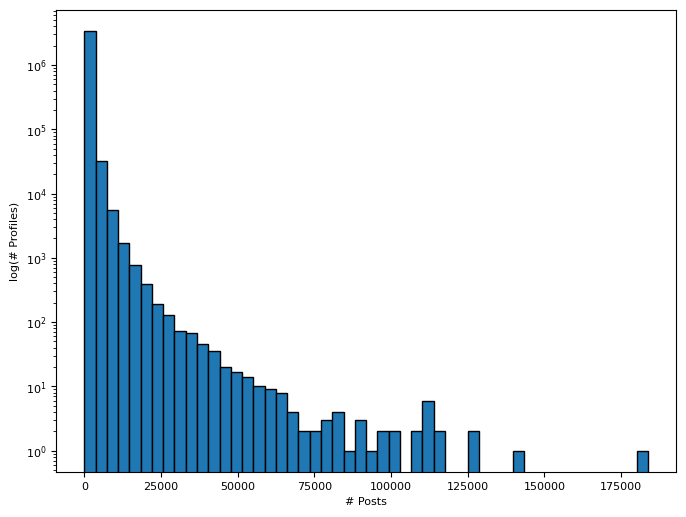

In [34]:
sorted_profiles = profiles_df.sort_values(by='n_posts', ascending=False)
sorted_profiles.dropna(subset=['n_posts'], inplace=True)
sorted_profiles['n_posts'].plot(kind='hist', logy=True, bins=50, edgecolor='black')
plt.xlabel('# Posts')
plt.ylabel('log(# Profiles)')

#### What posts have the highest number of "likes"?

#### What posts have the most and the least number of comments?

#### How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

#### How many posts include only photos? How many also have videos?

In [ ]:
# Requires sorting, maybe use cut? 

#### What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?


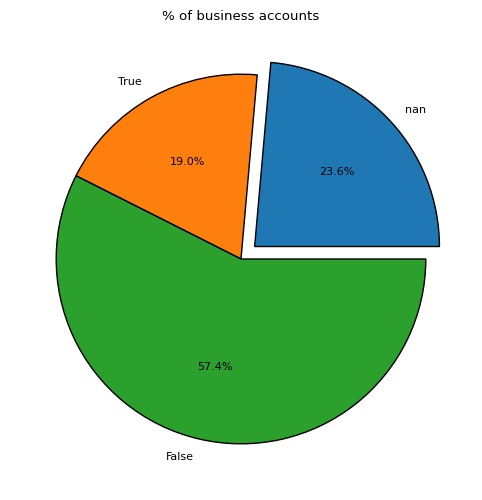

In [35]:
N = len(profiles_df)
n_business_na = profiles_df['is_business_account'].isna().sum()
n_business_false = profiles_df['is_business_account'].value_counts()[False]
n_business_true = profiles_df['is_business_account'].value_counts()[True]

labels = ['nan', 'True', 'False']

plt.pie([n_business_na, n_business_true, n_business_false], labels=labels, explode=[.1, 0, 0], autopct='%1.1f%%', 
        wedgeprops={"edgecolor": "black"})
plt.title('% of business accounts')

plt.show()

### Research Question 3

#### What is the most common time in which users publish their posts?

In [3]:
columns = ['cts']
path = '~/Downloads/instagram_posts.zip'
posts_df = pd.to_datetime(pd.read_csv(path, delimiter='\t', usecols=columns).dropna().stack()).unstack()

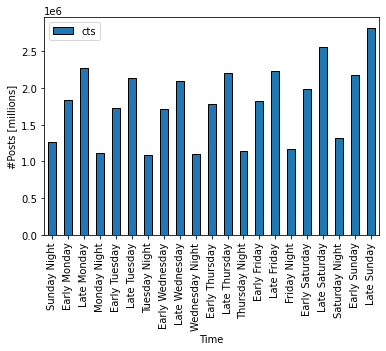

In [4]:
bins = pd.IntervalIndex.from_tuples([(0, 7), (8, 15), (16, 23)])

# posts_df["cts"].dt.hour
labels = ["Sunday Night", "Early Monday", "Late Monday", 
          "Monday Night", "Early Tuesday", "Late Tuesday", 
          "Tuesday Night", "Early Wednesday", "Late Wednesday", 
          "Wednesday Night", "Early Thursday", "Late Thursday", 
          "Thursday Night", "Early Friday", "Late Friday", 
          "Friday Night", "Early Saturday", "Late Saturday", 
          "Saturday Night", "Early Sunday", "Late Sunday"]

loc = range(len(labels))

posts_df.groupby([posts_df["cts"].dt.weekday, 
                  pd.cut(posts_df["cts"].dt.hour, bins=bins)]).count().plot(kind="bar",
                                                                            edgecolor="black")
plt.xlabel("Time")
plt.ylabel("#Posts [millions]")
plt.xticks(loc, labels, rotation="vertical")
plt.show()


#### Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [26]:
def time_to_plot(list_of_intervals):
    bin_list = []
    labels = []
    for t_0, t_end in list_of_intervals:
        labels.append(' -> '.join([t_0, t_end]))
        
        t_0 = pd.to_datetime(t_0).time()
        t_end = pd.to_datetime(t_end).time()
        
        bin_list.append((t_0.hour, t_end.hour))
    
    loc = range(len(labels))
    bins = pd.IntervalIndex.from_tuples(bin_list)
    result_df = posts_df.groupby(pd.cut(posts_df["cts"].dt.hour, bins=bins)).count()
    print(result_df)
    
    result_df.plot(kind="bar", edgecolor="black")
   
    plt.xlabel("Time")
    plt.ylabel("#Posts [millions]")
    plt.xticks(loc, labels, rotation="vertical")
    plt.show()

#### Use the function that you created in the previous literal to plot the number of posts between the following time intervals.

              cts
cts              
(6, 10]   5366649
(11, 13]  3894113
(14, 16]  4604061
(17, 19]  4986139
(20, 23]  6420525
(0, 2]    2666581
(3, 5]    2179579


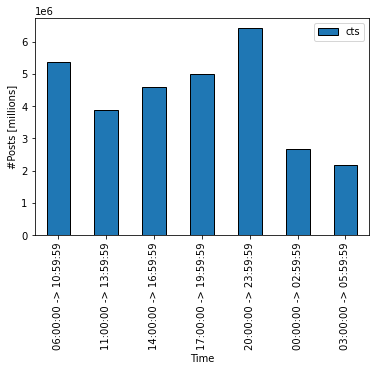

In [27]:
time_intervals = [("06:00:00", "10:59:59"), 
                  ("11:00:00", "13:59:59"), 
                  ("14:00:00", "16:59:59"), 
                  ("17:00:00", "19:59:59"), 
                  ("20:00:00", "23:59:59"),
                  ("00:00:00", "02:59:59"),
                  ("03:00:00", "05:59:59")]

time_to_plot(time_intervals)

### Research Question 4

### Research Question 5

 ##### Plot the top 10 most popular users in terms of followers and their number of posts.

In [4]:
top_10_profiles = profiles_df.sort_values(by=['followers'], ascending=False).head(10)

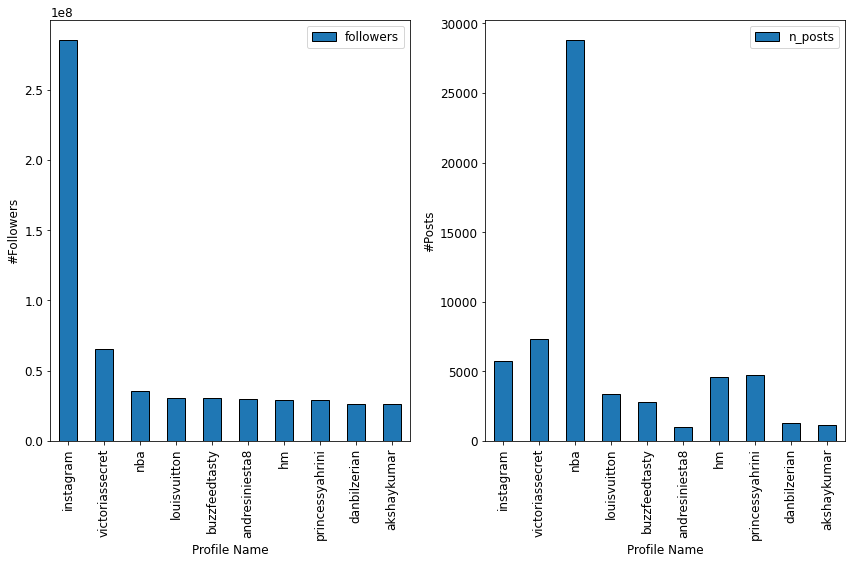

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True)

top_10_profiles.plot.bar(x='profile_name', y='followers', ax=ax1, edgecolor='black')
ax1.set_xlabel('Profile Name')
ax1.set_ylabel('#Followers')

top_10_profiles.plot.bar(x='profile_name', y='n_posts', ax=ax2, edgecolor='black')
ax2.set_xlabel('Profile Name')
ax2.set_ylabel('#Posts')

fig.tight_layout()
plt.show()

##### Who is the most influential user?

In [7]:
top_name = top_10_profiles.iloc[0]['profile_name']
top_id = top_10_profiles.iloc[0]['profile_id']
top_sid = top_10_profiles.iloc[0]['sid']

In [6]:
top_10_profiles

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,2.502532e+07,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False
2582507,371414,3.416684e+06,victoriassecret,Victoria's Secret,Confidence is sexy. #wearitdaily,549.0,65269440.0,7355.0,like2b.uy/victoriassecret,NaN,True
3820939,337097,2.082449e+07,nba,NBA,"30 teams, 1 🏆\n👟: @nbakicks \n📽: @nbahistory \...",817.0,35339708.0,28816.0,nba.app.link/js6X7SVaxT,NaN,True
701965,330376,1.876191e+08,louisvuitton,Louis Vuitton Official,The official Instagram account of Louis Vuitton.,5.0,30689316.0,3352.0,on.louisvuitton.com/Like2Buy,NaN,True
2414951,292359,2.125507e+09,buzzfeedtasty,Tasty,"Recipes that will make you say ""oh yes!""\n👇 Cl...",298.0,30246783.0,2791.0,tasty.co/linkinbio,NaN,True
2785241,3437294,4.968651e+08,andresiniesta8,Andres Iniesta,"Andres Iniesta Official Instagram Account, \nB...",151.0,29542143.0,990.0,mikakus.com,2019-05-08 23:54:35.377 -0400,False
333193,158690,2.341008e+07,hm,H&M,Welcome to #HM! Follow us at @HM_Man @HM_Kids ...,403.0,29176804.0,4566.0,hm.info/1c9he,2018-05-31 19:33:46.022 -0400,True
3934581,3615154,2.423993e+07,princessyahrini,Syahrini,NaN,835.0,29042823.0,4719.0,www.youtube.com/c/ThePrincesSyahrini,2019-06-26 15:05:53.411 -0400,True
1311970,508140,5.041706e+07,danbilzerian,Dan Bilzerian,Snapchat: dbilzerian,252.0,26476004.0,1311.0,www.ignite.co,NaN,True
1703764,3513205,9.070254e+08,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False


##### Have they posted anything with tagged locations? 

In [6]:
loc_columns = ['profile_id', 'location_id', 'sid_profile']
path = '~/Downloads/instagram_posts.zip'
post_loc_df = pd.read_csv(path, delimiter='\t', usecols=loc_columns)

In [10]:
top_post_df = post_loc_df[post_loc_df["profile_id"] == top_id]

In [20]:
print('Number of posts:', 3*'\t', len(top_post_df))
print('Number of posts w/ tagged location:', '\t', len(top_post_df))
print('Number of posts w/o tagged location:', '\t ', len(top_post_df[top_post_df['location_id'].isna()]))

Number of posts: 			 34
Number of posts w/ tagged location: 	 34
Number of posts w/o tagged location: 	  0


#### Extract the most frequent areas on their posts and plot the number of times each city has been visited.

In [21]:
locs = top_post_df["location_id"] 

In [25]:
loc_df[loc_df.id.isin(locs)]

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
24242,742280,9519563,榮發大排檔 Wing Fat Restaurant,Temple Street 148,852,"Kowloon, Hong Kong",NaN,HK,23881666,False,...,NaN,NaN,NaN,NaN,114.170372,22.307680,wingfatseafood,wing-fat-restaurant,"http://en.wikipedia.org/wiki/Temple_Street,_Ho...",2019-05-30 00:49:34.425
45930,762145,5332856,Rosa Parks Plaza,250 N Lamar St,75202,"Dallas, Texas",NaN,US,(214) 979-1111,False,...,Downtown Dallas,downtown-dallas,US,United States,-96.804370,32.780616,NaN,rosa-parks-plaza,NaN,2019-05-30 21:26:01.789
60533,775485,587387369,Ethiopian Highlands,NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,38.166667,10.000000,NaN,ethiopian-highlands,NaN,2019-05-31 11:22:21.183
96048,804342,877066659067597,Machu Picchu,Machu Picchu,NaN,"Cusco, Peru",NaN,PE,NaN,False,...,Mondor Pampa Aserradero,mondor-pampa-aserradero,PE,Peru,-72.545428,-13.164656,MachuPicchuWonderOfTheWorld,machu-picchu,NaN,2019-06-01 16:12:10.227
136417,838341,350021298,Parkland County,NaN,NaN,"Stony Plain, Alberta",NaN,CA,+1 780-968-8445,False,...,NaN,NaN,NaN,NaN,-114.006000,53.530000,NaN,parkland-county,http://www.parklandcounty.com,2019-06-03 04:41:24.810
573108,891690,2193902,Porto Vecchio,Rue De La Citadelle,20137,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,porto-vecchio,NaN,2019-06-06 05:51:26.121
594752,916365,1021722711,Falla Maestro Gozalbo - Conde de Altea,"Calle Conde Altea, 5",46005,Valencia,NaN,ES,+34 963 95 39 24,False,...,Valencia,valencia,ES,Spain,-0.369870,39.465309,fallamaestrogozalbo,falla-maestro-gozalbo-conde-de-altea,http://www.fallamaestrogozalbo.com/,2019-06-07 06:13:12.712
626047,951387,927381377419380,Novi Sad Serbia,Руменачки пут,21000,"Novi Sad, Serbia",NaN,RS,NaN,False,...,NaN,NaN,NaN,NaN,19.836900,45.251700,NaN,novi-sad-serbia,https://novisad.com,2019-06-08 15:38:40.302
650437,976713,873036082898953,Mt Kosciuszko,Kosciuszko Summit Walk,2627,Kosciuszko,NaN,AU,NaN,False,...,NaN,NaN,NaN,NaN,148.263975,-36.456525,NaN,mt-kosciuszko,http://www.nationalparks.nsw.gov.au/visit-a-pa...,2019-06-09 17:25:36.519
661170,987708,592482131,Revillagigedo Islands,NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-112.766667,18.816667,NaN,revillagigedo-islands,NaN,2019-06-10 03:12:40.022


Text(0.5, 1.0, 'Frequency of visited cities of top instagram user')

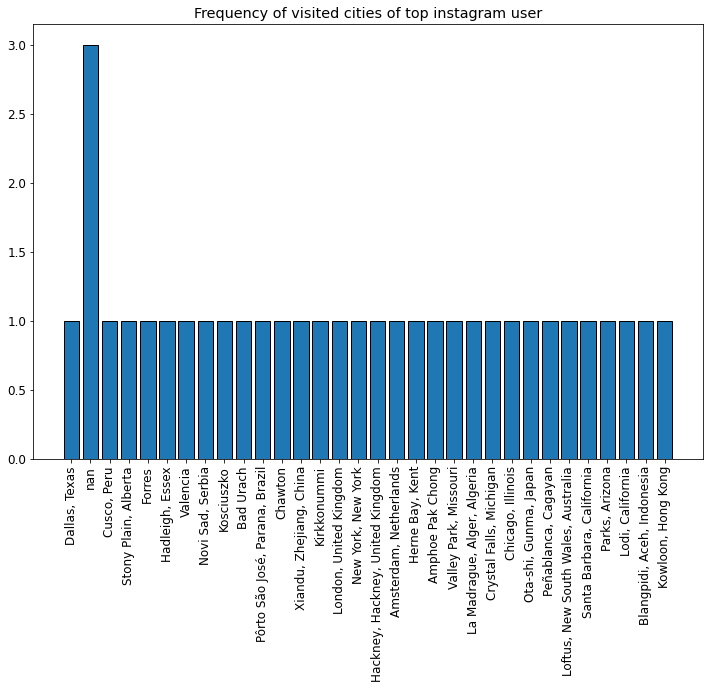

In [51]:
city_dic = {}
for post_loc in locs.dropna():
    try:
        current_city = loc_df[loc_df.id == post_loc]["city"].iloc[0]
    except:
        current_city = 'weird'
    if current_city in city_dic.keys():
        city_dic[current_city] += 1
    else:
        city_dic[current_city] = 1

labels = list(map(str, city_dic.keys()))
values =  city_dic.values()

plt.bar(height=values, x=range(len(labels)), tick_label=labels, edgecolor='black')
plt.xticks(rotation=90)
plt.title("Frequency of visited cities of top instagram user")

How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [65]:
type_columns = ["profile_id", "post_type"]
post_type_df = pd.read_csv(path, delimiter='\t', usecols=type_columns)

<AxesSubplot:ylabel='None'>

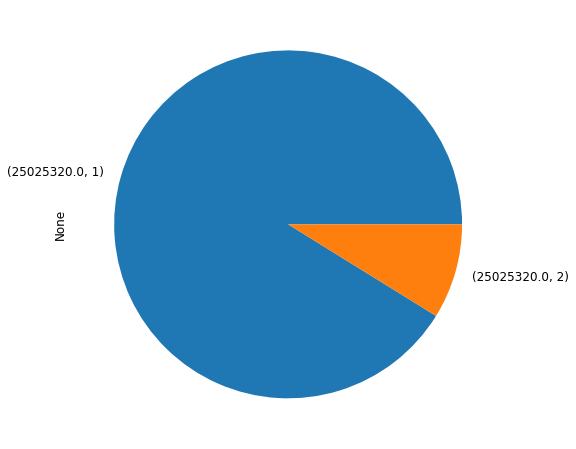

In [80]:
top_post_type = post_type_df[post_type_df["profile_id"] == top_id]

top_post_type.groupby(['type_df']).sum().plot(kind='pie', y='votes_of_each_class')


How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

### Research Question 6

### Research Question 7

In [6]:
type_columns = ["post_id", "profile_id", "location_id"]
path = '~/Downloads/instagram_posts.zip'
post_type_df = pd.read_csv(path, delimiter='\t', usecols=type_columns)

In [14]:
test_df = post_type_df.head(1000)

In [16]:
test_df.profile_id.unique().__len__()

812

In [31]:
test_df.groupby('profile_id').head()

,post_id,profile_id,location_id
0,BXdjjUlgcgq,2.237948e+09,1.022366e+15
1,BVg0pbolYBC,5.579335e+09,4.574268e+14
2,BRgkjcXFp3Q,3.134296e+08,4.574268e+14
3,BKTKeNhjEA7,1.837593e+09,4.574268e+14
4,8-NQrvoYLX,1.131527e+09,4.574268e+14
...,...,...,...
995,Bl8QZnfn0T2,2.487865e+07,2.539680e+07
996,Bmbh2XUAF-a,1.449489e+08,2.539680e+07
997,ByClIt6i1-N,2.205002e+07,2.539680e+07
998,ByBjmzeCWTD,2.205002e+07,2.539680e+07


In [32]:
def doCalculation(df):
    
    len_group = len(df['location_id'])
    set_group = len(df['location_id'].unique())
    
    if len_group != set_group:
        return False
    else:
        return True

post_type_df.groupby('profile_id').apply(doCalculation).value_counts()

True     8724511
False    3109254
dtype: int64

In [33]:
n_true = 8724511
n_false = 3109254

11833765

In [35]:
post_type_df.profile_id.unique().__len__()

11833766

### Research Question 8